## lista_01
### Juan Fernando Ramírez, 20666
### Jonathan Espinoza 20022
El usuario debe tener la opción de pasar los siguientes argumentos:
* la imagen de entrada,
* el tamaño de los bloques b × b,
* el número de componentes k a utilizar en la compresión.

Redactar un informe técnico en el formato indicado, en el cu´al deben desarrollar su solución de la implementación.
Desarrollar al menos dos ejemplos con diferentes imágenes. Para cada imagen
* Calcular diferentes compresiones cambiando los parámetros b o k. Indique las tasas de compresión obtenidas y tiempos de cómputo.
* ¿Cuál es el efecto sobre la compresión, al variar b y mantener el número de componentes? Mostrar evidencia
* ¿Cuál es el efecto sobre la compresión, al variar k y mantener el tamaño de los bloques? Mostrar evidencia
* Discutir los resultados obtenidos.




# README

## Descripción

Este programa es una herramienta de compresión de imágenes que utiliza la Descomposición en Valores Singulares (SVD) para reducir el tamaño de las imágenes. Puede trabajar con imágenes en escala de grises y en RGB.

## Dependencias

Para ejecutar este programa necesitarás las siguientes librerías:

- os
- numpy
- matplotlib
- PIL
- skimage

## Uso

Para usar este programa, debes tener una imagen en tu sistema de archivos local que desees comprimir.

Ejecuta el programa y sigue las instrucciones en pantalla. Se te pedirá que introduzcas la siguiente información:

- Ruta de la imagen: La ruta al archivo de imagen en tu sistema de archivos local.
- Modo de color: Elige entre "grayscale" (escala de grises) y "rgb".
- Número de componentes a mantener (`k`): Este número determina el número de componentes que se mantendrán en la compresión.
- Tamaño del bloque: Este número determina el tamaño de los bloques en los que se dividirá la imagen para la compresión.

Después de introducir esta información, el programa comprimirá la imagen y mostrará la tasa de compresión, así como una comparación visual de la imagen original y la imagen reconstruida.

## Advertencia

Este programa fue diseñado como una herramienta educativa y no se recomienda su uso para la compresión de imágenes en un contexto de producción. La calidad de la imagen reconstruida puede no ser adecuada para todos los usos.


#### Librerías

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray
from skimage import img_as_ubyte
import time

#### Función de compresión en escala de grises

In [2]:
# #### Función de compresión en escala de grises

def compress_blockwise_grayscale(image_path, block_size, k):
    """
    Comprime una imagen en escala de grises utilizando la descomposición en valores singulares (SVD)
    aplicada en bloques.

    Argumentos:
    image_path -- ruta a la imagen a comprimir.
    block_size -- tamaño de los bloques en los que se dividirá la imagen.
    k -- número de componentes a mantener en la compresión.
    """
    # Verifica que la ruta a la imagen sea una cadena de caracteres
    if not isinstance(image_path, str):
        raise ValueError('La ruta a la imagen debe ser una cadena de caracteres.')
        
    if not os.path.exists(image_path):
        raise FileNotFoundError('La imagen no se encuentra en la ruta proporcionada.')
    
    # Verifica que el tamaño del bloque y k sean enteros
    if not isinstance(block_size, int) or not isinstance(k, int):
        raise ValueError('El tamaño del bloque y k deben ser enteros.')

    # Verifica que el tamaño del bloque y k sean positivos
    if block_size <= 0 or k <= 0:
        raise ValueError('El tamaño del bloque y k deben ser positivos.')
        
    img = plt.imread(image_path)
    Igray = rgb2gray(img)

    # Get the dimensions of the image
    height, width = Igray.shape

    # Calculate the amount of padding needed
    pad_height = block_size - (height % block_size) if height % block_size != 0 else 0
    pad_width = block_size - (width % block_size) if width % block_size != 0 else 0

    # Pad the image
    Igray_padded = np.pad(Igray, ((0, pad_height), (0, pad_width)))

    # Create an empty list to hold the block vectors
    blocks = []

    # Loop over the image, block by block
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            # Extract the block from the image
            block = Igray_padded[i:i+block_size, j:j+block_size]

            # Reshape the block into a 1D vector and add it to the list
            blocks.append(block.reshape(-1))

    # Stack the block vectors into a matrix
    matrix = np.vstack(blocks)

    # Perform SVD on the matrix
    U, S, V = np.linalg.svd(matrix)

    # Keep only the first k singular values/components
    U_k = U[:,:k]
    S_k = S[:k]
    V_k = V[:k,:]

    # Reconstruct the matrix
    reconstructed_matrix = U_k @ np.diag(S_k) @ V_k

    # Reshape the reconstructed matrix back into blocks and place them in their original position in the image
    idx = 0
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            # Get the next reconstructed block vector
            block_vector = reconstructed_matrix[idx, :]

            # Reshape the block vector back into a block
            block = block_vector.reshape(block_size, block_size)

            # Place the block in the image
            Igray_padded[i:i+block_size, j:j+block_size] = block

            idx += 1

    # Remove the padding from the reconstructed image
    compressed_image = Igray_padded[:height, :width]

    return compressed_image


#### Función de compresión en RGB

In [3]:
def compress_blockwise_rgb(image_path, block_size, k):
    """
    Comprime una imagen en RGB utilizando la descomposición en valores singulares (SVD)
    aplicada en bloques.

    Argumentos:
    image_path -- ruta a la imagen a comprimir.
    block_size -- tamaño de los bloques en los que se dividirá la imagen.
    k -- número de componentes a mantener en la compresión.
    """
    # Verifica que la ruta a la imagen sea una cadena de caracteres
    if not isinstance(image_path, str):
        raise ValueError('La ruta a la imagen debe ser una cadena de caracteres.')
        
    if not os.path.exists(image_path):
        raise FileNotFoundError('La imagen no se encuentra en la ruta proporcionada.')
    
    # Verifica que el tamaño del bloque y k sean enteros
    if not isinstance(block_size, int) or not isinstance(k, int):
        raise ValueError('El tamaño del bloque y k deben ser enteros.')

    # Verifica que el tamaño del bloque y k sean positivos
    if block_size <= 0 or k <= 0:
        raise ValueError('El tamaño del bloque y k deben ser positivos.')
        
    img = plt.imread(image_path)

    # Get the dimensions of the image
    height, width, _ = img.shape

    # Calculate the amount of padding needed
    pad_height = block_size - (height % block_size) if height % block_size != 0 else 0
    pad_width = block_size - (width % block_size) if width % block_size != 0 else 0

    # Pad the image
    img_padded = np.pad(img, ((0, pad_height), (0, pad_width), (0, 0)))

    # Calculate the number of blocks
    num_blocks_height = img_padded.shape[0] // block_size
    num_blocks_width = img_padded.shape[1] // block_size
    
    # Create an empty array to hold the compressed image
    compressed_image = np.empty_like(img_padded)

    for channel in range(3):
        # Create a matrix to store all blocks as vectors for the current channel
        matrix = np.zeros((num_blocks_height * num_blocks_width, block_size * block_size))
        
        # Convert each block to a vector and store it in the matrix
        idx = 0
        for i in range(0, img_padded.shape[0], block_size):
            for j in range(0, img_padded.shape[1], block_size):
                block = img_padded[i:i+block_size, j:j+block_size, channel]
                matrix[idx, :] = block.flatten()
                idx += 1

        # Apply SVD to the matrix
        U, S, V = np.linalg.svd(matrix, full_matrices=False)

        # Keep only the first k singular values and components
        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        V_k = V[:k, :]

        # Reconstruct the matrix
        reconstructed_matrix = U_k @ S_k @ V_k

        # Convert each vector in the reconstructed matrix back to a block
        idx = 0
        for i in range(0, img_padded.shape[0], block_size):
            for j in range(0, img_padded.shape[1], block_size):
                block_vector = reconstructed_matrix[idx, :]
                compressed_image[i:i+block_size, j:j+block_size, channel] = block_vector.reshape(block_size, block_size)
                idx += 1

    # Remove the padding from the compressed image
    compressed_image = compressed_image[:height, :width, :]

    return compressed_image 

# Return the function for future use

#### Función de cálculo de compresión

In [4]:
def compression_ratio(original_image, k, scale):
    """
    Calcula la tasa de compresión de una imagen.

    Argumentos:
    original_image -- imagen original.
    k -- número de componentes a mantener en la compresión.
    scale -- escala de la imagen ('grayscale' o 'rgb').
    """
    # Verifica que la ruta a la imagen sea una cadena de caracteres
    if not isinstance(original_image, str):
        raise ValueError('La ruta a la imagen debe ser una cadena de caracteres.')
    
    if not os.path.exists(original_image):
        raise FileNotFoundError('La imagen no se encuentra en la ruta proporcionada.')
    
    # Verifica que k sea un entero
    if not isinstance(k, int):
        raise ValueError('k debe ser un entero.')

    # Verifica que k sea positivo
    if k <= 0:
        raise ValueError('k debe ser positivo.')
        
    # Verifica que scale sea una cadena de caracteres
    if not isinstance(scale, str):
        raise ValueError('La escala debe ser una cadena de caracteres.')
    
    # Verifica que scale sea 'grayscale' o 'rgb'
    if scale.lower() not in ['grayscale', 'rgb']:
        raise ValueError('La escala debe ser "grayscale" o "rgb".')
        
    original_image = plt.imread(original_image)
    # Calcula el tamaño en bytes de la imagen original
    bytes_orig = original_image.shape[0] * original_image.shape[1] * 4  # 4 bytes por elemento
    megas_orig = bytes_orig / (1024**2)

    print('Megabytes originales = {} Mb'.format(megas_orig))

    # Calcula el tamaño en bytes de la imagen comprimida
    if scale != 'grayscale':  # Para imágenes RGB
        bytes_red = 4 * ((original_image.shape[0] * k) + k + (k * original_image.shape[1])) * 3  # 3 canales
    else:  # Para imágenes en escala de grises
        Igray = rgb2gray(original_image)
        bytes_red = 4 * ((original_image.shape[0] * k) + k + (k * original_image.shape[1]))

    megas_red = bytes_red / (1024**2)

    print('Megabytes reducidos = {} Mb'.format(megas_red))
    
    return megas_red/megas_orig

#### Función de comparación de imagenes

In [5]:
def compare_images(original_path, reconstructed_image, k, mode):
    """
    Compara visualmente una imagen original y una imagen reconstruida.

    Argumentos:
    original_path -- ruta a la imagen original.
    reconstructed_image -- imagen reconstruida.
    k -- número de componentes a mantener en la compresión.
    mode -- modo de la imagen ('grayscale' o 'rgb').
    """
    # Verifica que la ruta a la imagen sea una cadena de caracteres
    if not isinstance(original_path, str):
        raise ValueError('La ruta a la imagen debe ser una cadena de caracteres.')
    
    if not os.path.exists(original_path):
        raise FileNotFoundError('La imagen no se encuentra en la ruta proporcionada.')
    
    # Verifica que k sea un entero
    if not isinstance(k, int):
        raise ValueError('k debe ser un entero.')

    # Verifica que k sea positivo
    if k <= 0:
        raise ValueError('k debe ser positivo.')
        
    # Verifica que mode sea una cadena de caracteres
    if not isinstance(mode, str):
        raise ValueError('El modo debe ser una cadena de caracteres.')
    
    # Verifica que mode sea 'grayscale' o 'rgb'
    if mode.lower() not in ['grayscale', 'rgb']:
        raise ValueError('El modo debe ser "grayscale" o "rgb".')
    original_image = plt.imread(original_path)

    if mode.lower() == 'grayscale':
        original_image = rgb2gray(original_image)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray' if mode.lower() == 'grayscale' else None)
    plt.title('Imagen Original')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='gray' if mode.lower() == 'grayscale' else None)
    plt.title('Imagen Reconstruida con k={} Componentes'.format(k))

    # Muestra la figura
    plt.show()


#### Programa

Introduce la ruta a tu imagen: spiderman.webp
Introduce el modo de color (grayscale o rgb): rgb
Introduce el número de componentes a mantener: 5
Introduce el tamaño del bloque: 8
Megabytes originales = 5.65338134765625 Mb
Megabytes reducidos = 0.14207839965820312 Mb
La tasa de compresión es: 0.02513157894736842


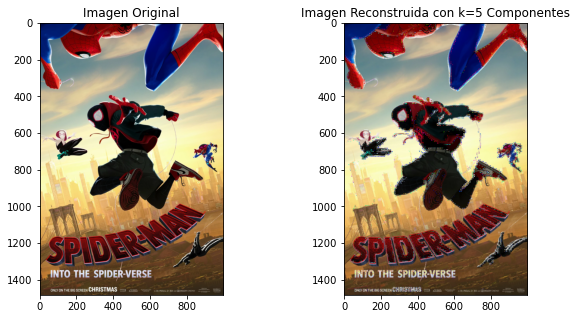

In [31]:
image_path = input('Introduce la ruta a tu imagen: ')
mode = input('Introduce el modo de color (grayscale o rgb): ')
k = int(input('Introduce el número de componentes a mantener: '))
block_size = int(input('Introduce el tamaño del bloque: '))


if mode.lower() == 'grayscale':
    reconstructed_image = compress_blockwise_grayscale(image_path, block_size, k)
elif mode.lower() == 'rgb':
    reconstructed_image = compress_blockwise_rgb(image_path, block_size, k)
else:
    print('¡Modo inválido! Debe ser "grayscale" o "rgb".')

ratio = compression_ratio(image_path, k, mode)
print('La tasa de compresión es:', ratio)

compare_images(image_path, reconstructed_image, k, mode)


#### Perfilador


In [6]:
def adjusted_profile_compression(image_path):
    """
    Profiles the compress_blockwise_grayscale function for adjusted values of k and block_size.
    """
    k_values = list(range(5, 201, 15))  # k varies from 5 to 200 in steps of 15
    block_sizes = list(range(8, 240, 8))  # block size from 0 to 240 in steps of 8
    
    profiling_results = {}

    for block_size in block_sizes:
        for k in k_values:
            start_time = time.time()
            
            # Calling the compression function
            compress_blockwise_rgb(image_path, block_size, k)
            
            end_time = time.time()
            
            elapsed_time = end_time - start_time
            profiling_results[(block_size, k)] = elapsed_time

    return profiling_results

# Running the adjusted profiling function on the provided image
image_path = "spiderman.webp"
adjusted_profiling_results_rgb = adjusted_profile_compression(image_path)

KeyboardInterrupt: 

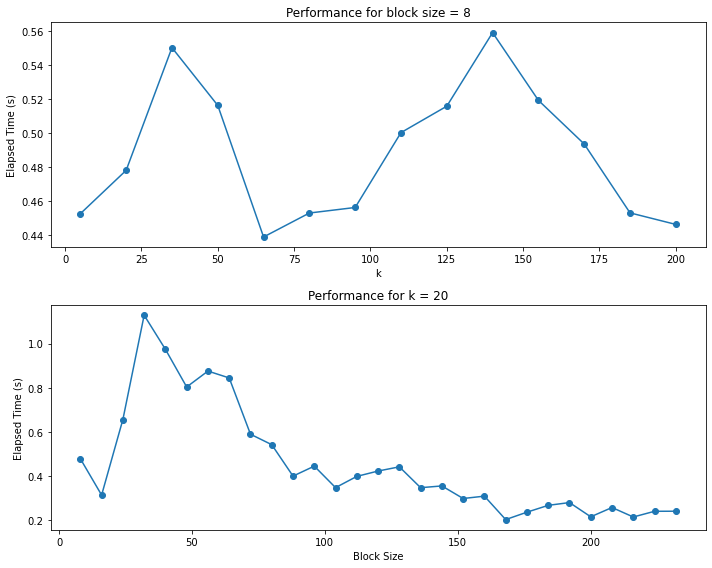

In [86]:
# Selecting a block size and k value for profiling
selected_block_size = 8
selected_k_value = 20

# Filter results for the selected block size and k value
block_size_results = [(k, t) for (bs, k), t in adjusted_profiling_results_rgb.items() if bs == selected_block_size]
k_value_results = [(bs, t) for (bs, k), t in adjusted_profiling_results_rgb.items() if k == selected_k_value]

# Separate keys and values
k_values, elapsed_times_block = zip(*block_size_results)
block_sizes, elapsed_times_k = zip(*k_value_results)

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot block size results
axs[0].plot(k_values, elapsed_times_block, marker='o')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Elapsed Time (s)')
axs[0].set_title(f'Performance for block size = {selected_block_size}')

# Plot k value results
axs[1].plot(block_sizes, elapsed_times_k, marker='o')
axs[1].set_xlabel('Block Size')
axs[1].set_ylabel('Elapsed Time (s)')
axs[1].set_title(f'Performance for k = {selected_k_value}')

plt.tight_layout()
plt.show()
